In [38]:
import numpy as np
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn
import sounddevice as sd
import soundfile as sf
from AimTTI_PLP import dev_TTI_PLP
from time import sleep

#GET TENSOR FOR SPECTROGRAM
def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = torchaudio.load(aud)
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)
#VIEW SPECTROGRAM
def view_specrogram(aud,n_fft=1024, samplerate = 22050, hop_len=None):
    samples, sample_rate=librosa.load(aud, sr = samplerate)
    print(sample_rate)
    audio_stft = librosa.core.stft(samples, hop_length=hop_len, n_fft=n_fft)# gathering the absolute values for all values in our audio_stft 
    spectrogram = np.abs(audio_stft)# Converting the amplitude to decibel
    #librosa.feature.melspectrogram(S=spectrogram,sr=sample_rate, fmax=4000)
    #librosa.feature.spectral_bandwidth(*, y=None, sr=44100, S=None, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, pad_mode='constant', freq=None, centroid=None, norm=True, p=2)
    log_spectro = librosa.amplitude_to_db(spectrogram)# Plotting the short-time Fourier Transformation
    plt.figure(figsize=(20, 5))# Using librosa.display.specshow() to create our spectrogram
    librosa.display.specshow(log_spectro, sr=sample_rate, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(label='Decibels')
    plt.title('Spectrogram (dB)', fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Frequency', fontdict=dict(size=15))
    plt.show()

# def view_spectrogram_new(array, sample_rate, n_fft = 1024, hop_len = None):
#     samples = array
#     print(sample_rate)
#     audio_stft = librosa.core.stft(samples, hop_length=hop_len, n_fft=n_fft)# gathering the absolute values for all values in our audio_stft 
#     spectrogram = np.abs(audio_stft)# Converting the amplitude to decibel
#     #librosa.feature.melspectrogram(S=spectrogram,sr=sample_rate, fmax=4000)
#     #librosa.feature.spectral_bandwidth(*, y=None, sr=44100, S=None, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, pad_mode='constant', freq=None, centroid=None, norm=True, p=2)
#     log_spectro = librosa.amplitude_to_db(spectrogram)# Plotting the short-time Fourier Transformation
#     plt.figure(figsize=(20, 5))# Using librosa.display.specshow() to create our spectrogram
#     librosa.display.specshow(log_spectro, sr=sample_rate, x_axis='time', y_axis='hz', hop_length=hop_length, cmap='magma')
#     plt.colorbar(label='Decibels')
#     plt.title('Spectrogram (dB)', fontdict=dict(size=18))
#     plt.xlabel('Time', fontdict=dict(size=15))
#     plt.ylabel('Frequency', fontdict=dict(size=15))
#     plt.show()

In [54]:
#RECORD SOUND
fs=int(44100)
duration = 4
myrec = sd.rec(int(duration*fs), samplerate=fs, channels = 1, blocking = False)

TTI = dev_TTI_PLP(portstr='COM9')    

idn=TTI.get_identity()
print('GetIdentity (*IDN?) in AimTTI_PLP.py returns: {}'.format(idn))

TTI._Vlimit = 12.0

TTI.SetVoltage = 12.0
TTI.SetCurrent = 0.30

sleep(2)
TTI.OutputOff

for _ in range(20):

    sleep(0.5)
    TTI.OutputOn
    sleep(0.5)
    TTI.OutputOff
    
    
TTI.close() 

GetIdentity (*IDN?) in AimTTI_PLP.py returns: THURLBY THANDAR, PL303-P, 496139, 3.05-4.06


In [53]:
#PLAY SOUND
myrecording=sd.playrec(myrec,fs,channels=1)

In [55]:
sf.write('new_file.wav', myrec, fs)

44100


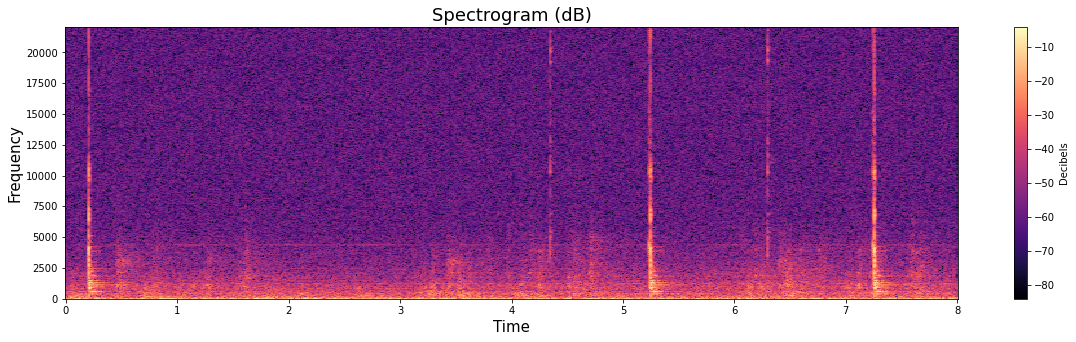

In [56]:
view_specrogram('new_file.wav',n_fft=1024,samplerate=fs, hop_len=None)

In [73]:
sf.write('new_file1.wav', myrec, 44100)

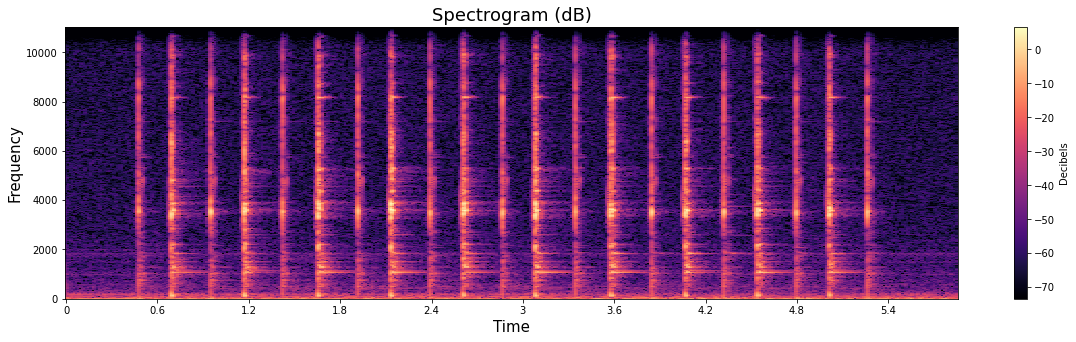

In [43]:
view_specrogram('new_file1.wav',n_fft=1024, hop_len=None)

22050


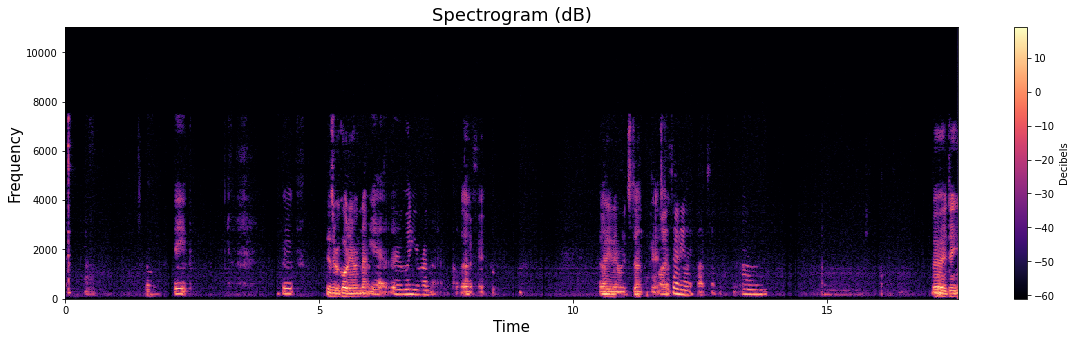

In [98]:
sf.write('new_file2.wav', myrec, 44100*2)
view_specrogram('new_file2.wav',n_fft=1024, hop_len=None)